In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [26]:
df=pd.read_csv('height-weight.csv')
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


Text(0, 0.5, 'Height')

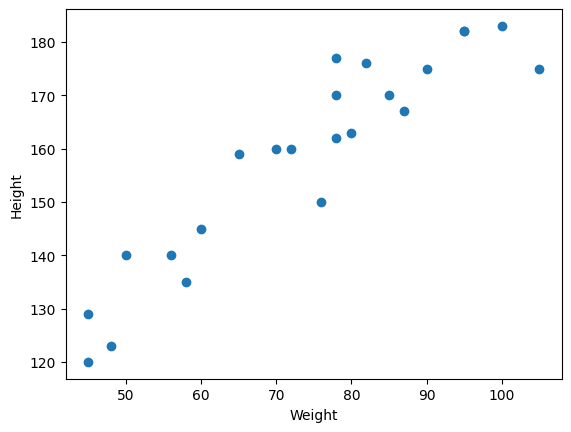

In [27]:
plt.scatter(df['Weight'],df['Height'])
plt.xlabel("Weight")
plt.ylabel("Height")

In [ ]:
#Dataset
#Divide the features based on independent and dependent features
#Train Test Split of dataset
#Standardize the data
#Training the model using Linear regression

#X_train is independent and y_train is dependent feature
#For training model x_test,y_test is used


In [12]:
x=df[['Weight']] #Independent feature
y=df['Height'] #Dependent feature

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)


In [15]:
x.shape

(23, 1)

In [16]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((18, 1), (5, 1), (18,), (5,))

In [17]:
#Standardize the dataset ....independent data
from sklearn.preprocessing import StandardScaler

In [24]:
sclaer=StandardScaler()


In [32]:
pd.DataFrame(x_train).head()

,0
0,1.736891
1,-0.920270
2,1.454214
3,0.210437
4,-1.485623


In [34]:
x_train=sclaer.fit_transform(x_train)
x_test=sclaer.transform(x_test)

C:\Users\siddh\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


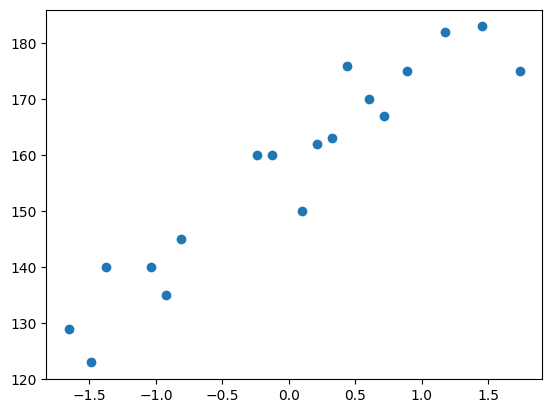

In [35]:
plt.scatter(x_train,y_train)

In [36]:
#Train the model Simple Linear regression model
from sklearn.linear_model import LinearRegression

In [37]:
regressor=LinearRegression()

In [38]:
regressor.fit(x_train,y_train)

LinearRegression()

In [40]:
print("The slope or coefficient of weight is : ",regressor.coef_ ) #17.0344 is the slope
print("Intercept : ",regressor.intercept_ )

The slope or coefficient of weight is :  [17.03440872]
Intercept :  157.5


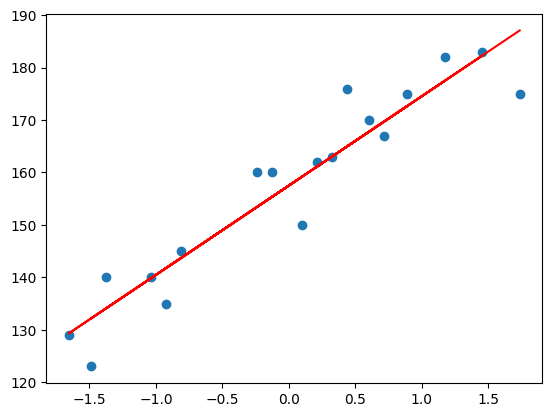

In [46]:
plt.scatter(x_train,y_train)
plt.plot(x_train,regressor.predict(x_train),color='r')

In [56]:
y_pred_test=regressor.predict(x_test)

In [49]:
y_pred_test,y_test

(array([1486.18388009, 1486.18388009,  924.04839236, 1775.76882831,
        1264.73656674]),
 15    177
 9     170
 0     120
 8     182
 17    159
 Name: Height, dtype: int64)

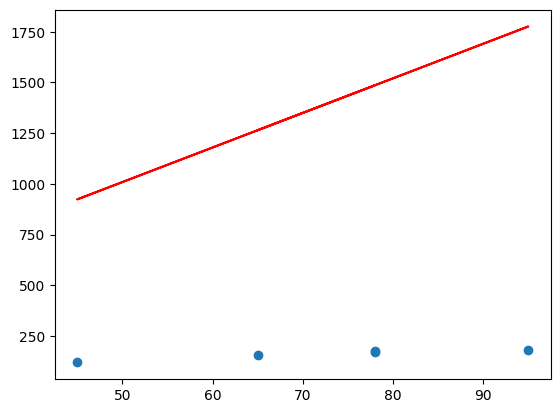

In [57]:
plt.scatter(x_test,y_test)
plt.plot(x_test,regressor.predict(x_test),color='r')

In [58]:
#Performance Metrics
#MSE,MAE,RMSE and R,Adjusted R-square

from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [60]:
mse=mean_squared_error(y_test,y_pred_test)   #Y_test=real value and Y_pred_test = model value
mae=mean_absolute_error(y_test,y_pred_test)
rmse=np.sqrt(mse)
print(mae)
print(mse)
print(rmse)

1225.7843095186977
1571109.7376966465
1253.4391639392184


In [61]:
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred_test)

In [62]:
score

-3190.755521080462

In [63]:
1-(1-score)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)

-4254.6740281072825

In [64]:
scaled_wt=sclaer.transform([[80]])
scaled_wt

array([[80.]])

In [67]:
regressor.predict([scaled_wt[0]])

array([1520.25269753])

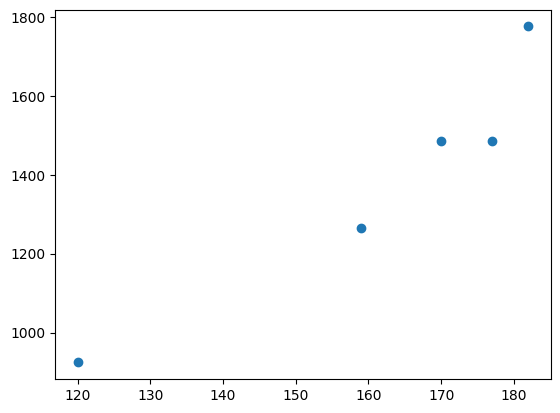

In [68]:
plt.scatter(y_test,y_pred_test)

In [69]:
residuals=y_test-y_pred_test
residuals

15   -1309.183880
9    -1316.183880
0     -804.048392
8    -1593.768828
17   -1105.736567
Name: Height, dtype: float64

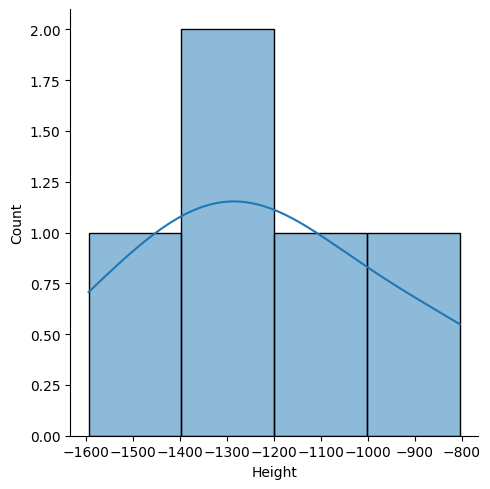

In [71]:
import seaborn as sns
sns.displot(residuals,kde=True)